In [1]:
import numpy as np
import scipy
import sklearn
import lightgbm
import csv
import os
import pandas as pd
import seaborn

In [ ]:
df = pd.read_csv('data/stanford_blueprint_datathon_2019_data.csv')

In [ ]:
columns_to_work_with = []

for dtype, column in zip(df.dtypes, df.dtypes.index):
    if dtype == 'object' and column != 'date':
        columns_to_work_with.append(column)
        
print(columns_to_work_with)

In [88]:
converted_df = pd.get_dummies(df, columns=columns_to_work_with)

chlamydia
7.703428501609949
0.2129900910044813
0.0 0.35379092230105136
gential_warts
23.655936792831753
0.3121138089850662
0.0 0.5412348336534387
gonorrhea
9.056362749093324
0.22368283622760882
0.0 0.3760128612168068
herpes
55.11773059400486
0.4446056953169286
0.0 0.8474659289868096
hpv
36.553441707571
0.348981345433681
0.0 0.6471402980294827
other_std
42.94037124480633
0.3852088630388288
0.0 0.7321864265852461
parasitic
15.823594699178443
0.26263790019690353
0.0 0.4512248125098253
std_screen
85.3856469860046
0.7830546655929608
0.0 0.9999314515057962
syphilis
14.117355266690907
0.29667303779388055
0.0 0.4796353591732873
trich
19.330454116784594
0.26332856564936974
0.0 0.456368040573786


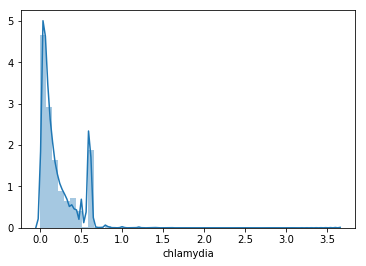

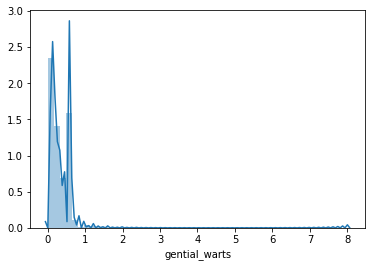

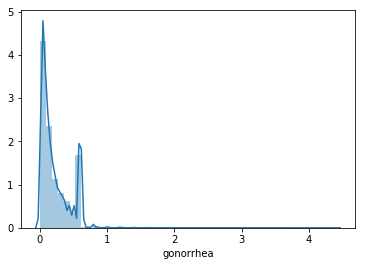

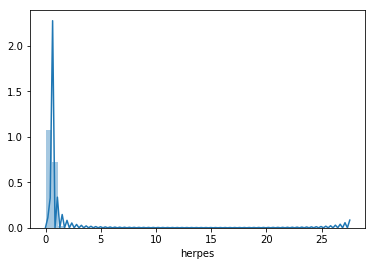

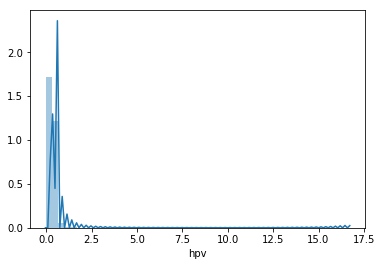

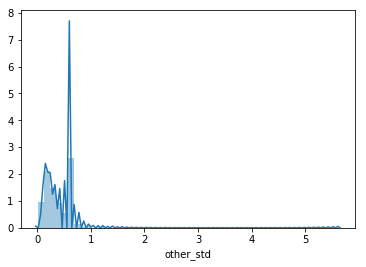

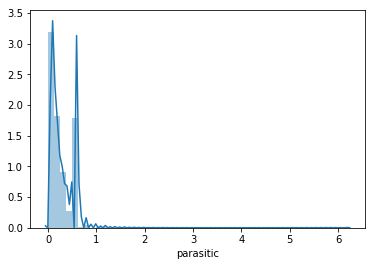

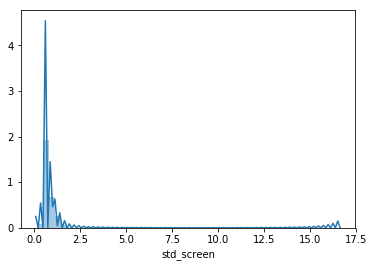

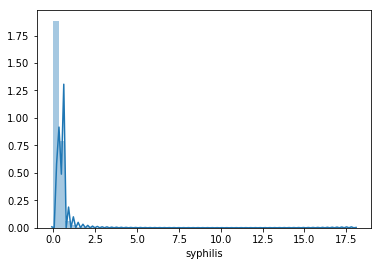

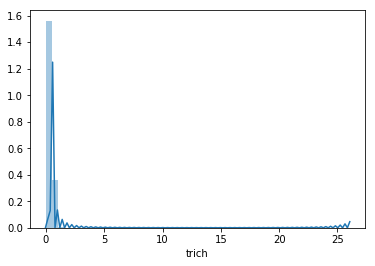

<Figure size 432x288 with 0 Axes>

In [78]:
import seaborn
import matplotlib.pyplot as plt

diseases = ['chlamydia', 'gential_warts', 
'gonorrhea',
'herpes',
'hpv',
'other_std',
'parasitic',
'std_screen',
'syphilis',
'trich']
for disease in diseases:
    print(disease)
    print(100 - converted_df[disease].isna().sum() / len(converted_df[disease]) * 100)
    no_na = converted_df[disease].dropna()
    print(no_na.mean())
    print((no_na == 0.0).mean(), (no_na > 0.2).mean())
    seaborn.distplot(no_na)
    plt.figure()

In [110]:
target_disease = 'parasitic'

def add_months(date, delta):
    year, month, day = date.split('-')
    year = int(year)
    month = int(month)
    
    month += delta
    
    while month <= 0:
        month += 12
        year -= 1
    
    while month > 12:
        month -= 12
        year += 1

    return f'{year}-{month:02}-{day}'
    
    
def get_labels(prediction_date, target_disease):
    target_date = add_months(prediction_date, 3)
    target_data = df[df['date'] == target_date]
    target_data = target_data.dropna(subset=[target_disease])
    result = pd.DataFrame(target_data, columns=['age', 'gender', 'state', 'income', 'education', target_disease])
    return result

train_date = '2016-10-01'
test_date = '2017-01-01'

train_data = df[df['date'] == train_date]

# def get_matrix(prediction_date):
    
#     data = converted_df[converted_df['date'] == prediction_date]
    



# test_data = converted_df[converted_df['date'] == ]
# test_targets = converted_df[converted_df['date'] == '2016-10-01']

# train_data = train_data.dropna(subset=[target_disease])
# test_data = test_data.dropna(subset=[target_disease])

In [98]:
import sklearn.linear_model

model = sklearn.linear_model.ElasticNetCV()

print(train_data.values)

model.fit(train_data.values, train_data['std_screen'].values)

[[0.14751315566117806 0.11288406043116618 0.19758954337124424 ... 0 1 0]
 [0.0433615744882387 0.0299426406356891 0.1793927274640846 ... 0 0 1]
 [0.060486871478686074 0.05389603486765175 0.0587434888912512 ... 0 0 1]
 ...
 [0.041954917083181616 0.034259044718811034 0.09278077521432593 ... 0 0 1]
 [0.08624518400917944 0.0780746917518584 0.04142123042074079 ... 0 0 1]
 [0.04916856890899195 0.039320509196163735 0.11659022535769893 ... 0 0 1]]


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').